In [ ]:
!git clone https://github.com/dellacortelab/milcdock.git

# *MAKE SURE TO CHANGE RUNTIME TYPE TO GPU*

# Load model and data

In [1]:
import torch

from milcdock.model import get_model
from milcdock.dataset import get_dataloader

model_path = '/content/milcdock/data/saved_models/ensemble_mlp/dude-lit-pcba'
# model_path = '/content/milcdock/data/saved_models/mlp/dude-lit-pcba.pt'
data_path = '/content/milcdock/data/test_data/test_data.pkl'

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = get_model(model_path=model_path, device=device)
dataloader = get_dataloader(data_path=data_path)

# Assign scores to each ligand

In [2]:
from milcdock.evaluate import evaluate

scores = evaluate(model, dataloader, device)

Finished evaluating:  igf1r
Finished evaluating:  reni
Finished evaluating:  GBA
Finished evaluating:  ALDH1


# Evaluate by AUC, BEDROC, and EF metrics

In [3]:
print("AUCs: ", scores['all_t_auc'])
print("BEDROCs: ", scores['all_t_bedroc'])
print("EFs: ", scores['all_t_ef'])

AUCs:  {'igf1r': 0.8712000828910124, 'reni': 0.9491419639157783, 'GBA': 0.6646956454375407, 'ALDH1': 0.4964428372017501}
BEDROCs:  {'igf1r': 0.6260859769230188, 'reni': 0.8961555066405231, 'GBA': 0.04671192336077085, 'ALDH1': 0.049459359620754886}
EFs:  {'igf1r': 24.389518805309734, 'reni': 17.616151473857848, 'GBA': 7.978042497313076, 'ALDH1': 0.9688307100334655}


# Visualize scoring of active/inactive ligands

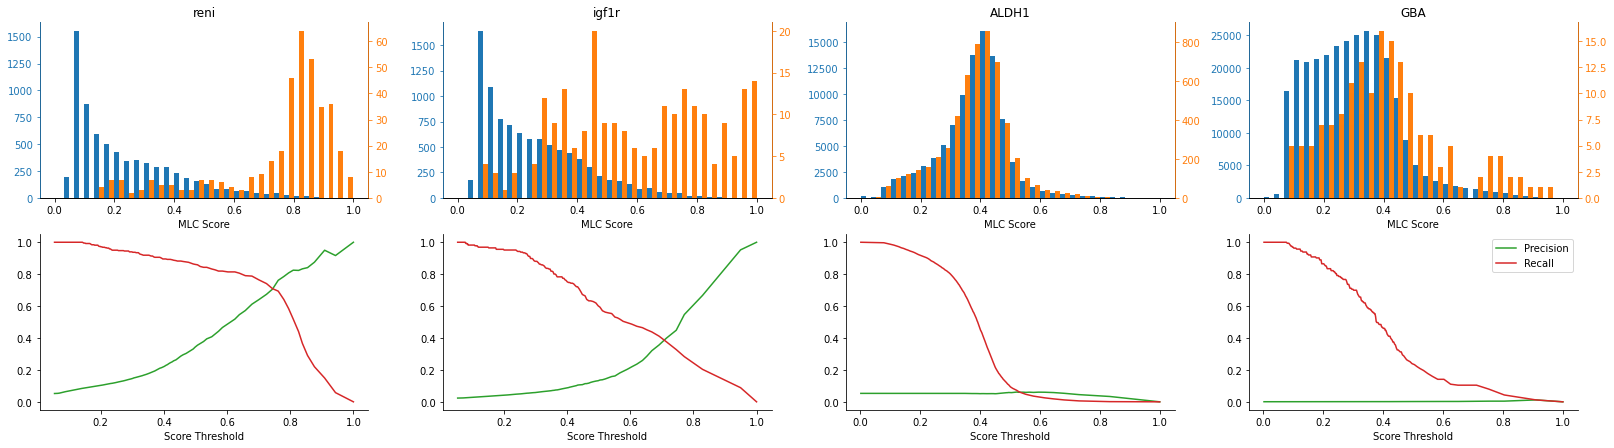

In [4]:
from milcdock.figures import make_hist

make_hist(scores['all_preds'], scores['all_labels'], dataloader.dataset.df['receptor'])